# Extract GCPs from a folder of images with Pix4D labels file
First, we find all subdirectories in the datafolder directory

In [4]:
import os,pdb
rootfolder = "/media/josealb/HDD_1/Datasets/Self_driving/dataset-sdcnd-capstone"
datafolder = rootfolder + "/data"
subdirs = [x[0] for x in os.walk(datafolder)] 
%matplotlib inline
subdirs
subdirs.pop(0)
subdirs

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from random import randint
import csv

Now, we iterate over each image and save its GCP information to a CSV file

In [7]:
import tensorflow as tf
import yaml
import os
from object_detection.utils import dataset_util


#flags = tf.app.flags
#flags.DEFINE_string('output_path', '', 'Path to output TFRecord')
#FLAGS = flags.FLAGS

LABEL_DICT =  {
    "Green" : 1,
    "Red" : 2,
    "GreenLeft" : 3,
    "GreenRight" : 4,
    "RedLeft" : 5,
    "RedRight" : 6,
    "Yellow" : 7,
    "off" : 8,
    "RedStraight" : 9,
    "GreenStraight" : 10,
    "GreenStraightLeft" : 11,
    "GreenStraightRight" : 12,
    "RedStraightLeft" : 13,
    "RedStraightRight" : 14
    }

def create_tf_example(example):
    
    # Bosch
    height = 720 # Image height
    width = 1280 # Image width

    filename = example['path'] # Filename of the image. Empty if image is not from file
    filename = filename.encode()

    with tf.gfile.GFile(example['path'], 'rb') as fid:
        encoded_image = fid.read()

    image_format = 'png'.encode() 

    xmins = [] # List of normalized left x coordinates in bounding box (1 per box)
    xmaxs = [] # List of normalized right x coordinates in bounding box
                # (1 per box)
    ymins = [] # List of normalized top y coordinates in bounding box (1 per box)
    ymaxs = [] # List of normalized bottom y coordinates in bounding box
                # (1 per box)
    classes_text = [] # List of string class name of bounding box (1 per box)
    classes = [] # List of integer class id of bounding box (1 per box)

    for box in example['boxes']:
        #if box['occluded'] is False:
        #print("adding box")
        xmins.append(float(box['x_min'] / width))
        xmaxs.append(float(box['x_max'] / width))
        ymins.append(float(box['y_min'] / height))
        ymaxs.append(float(box['y_max'] / height))
        classes_text.append(box['label'].encode())
        classes.append(int(LABEL_DICT[box['label']]))


    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_image),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))

    return tf_example


def main(_):
    
    writer = tf.python_io.TFRecordWriter('/media/josealb/HDD_1/Datasets/Self_driving/bosch-dataset/train.records')
    
    # BOSCH
    INPUT_YAML = "/media/josealb/HDD_1/Datasets/Self_driving/bosch-dataset/train.yaml"
    examples = yaml.load(open(INPUT_YAML, 'rb').read())

    #examples = examples[:10]  # for testing
    len_examples = len(examples)
    print("Loaded ", len(examples), "examples")

    for i in range(len(examples)):
        examples[i]['path'] = os.path.abspath(os.path.join(os.path.dirname(INPUT_YAML), examples[i]['path']))
    
    counter = 0
    for example in examples:
        tf_example = create_tf_example(example)
        writer.write(tf_example.SerializeToString())

        if counter % 10 == 0:
            print("Percent done", (counter/len_examples)*100)
        counter += 1

    writer.close()
    print("writer closed")


if __name__ == '__main__':
    tf.app.run()
    
    print("run app")


Loaded  5093 examples
Percent done 0.0
Percent done 0.19634792852935404
Percent done 0.3926958570587081
Percent done 0.589043785588062
Percent done 0.7853917141174162
Percent done 0.98173964264677
Percent done 1.178087571176124
Percent done 1.3744354997054782
Percent done 1.5707834282348323
Percent done 1.7671313567641862
Percent done 1.96347928529354
Percent done 2.159827213822894
Percent done 2.356175142352248
Percent done 2.5525230708816022
Percent done 2.7488709994109564
Percent done 2.94521892794031
Percent done 3.1415668564696646
Percent done 3.337914784999018
Percent done 3.5342627135283724
Percent done 3.7306106420577265
Percent done 3.92695857058708
Percent done 4.123306499116435
Percent done 4.319654427645788
Percent done 4.516002356175142
Percent done 4.712350284704496
Percent done 4.90869821323385
Percent done 5.1050461417632045
Percent done 5.301394070292558
Percent done 5.497741998821913
Percent done 5.694089927351267
Percent done 5.89043785588062
Percent done 6.086785784

Percent done 51.443157274690755
Percent done 51.639505203220104
Percent done 51.83585313174947
Percent done 52.032201060278815
Percent done 52.228548988808164
Percent done 52.42489691733753
Percent done 52.621244845866876
Percent done 52.817592774396225
Percent done 53.01394070292559
Percent done 53.21028863145494
Percent done 53.406636559984285
Percent done 53.60298448851365
Percent done 53.799332417043
Percent done 53.99568034557235
Percent done 54.19202827410171
Percent done 54.388376202631065
Percent done 54.584724131160414
Percent done 54.78107205968977
Percent done 54.977419988219125
Percent done 55.173767916748474
Percent done 55.37011584527784
Percent done 55.566463773807186
Percent done 55.76281170233655
Percent done 55.9591596308659
Percent done 56.15550755939525
Percent done 56.35185548792461
Percent done 56.54820341645396
Percent done 56.74455134498331
Percent done 56.94089927351267
Percent done 57.13724720204202
Percent done 57.33359513057137
Percent done 57.52994305910073

SystemExit: 

/home/josealb/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


We train the model

In [ ]:
!export PYTHONPATH=$PYTHONPATH:/home/josealb/repos/DeepLearning/tools/models:/home/josealb/repos/DeepLearning/tools/models/slim
!cd /home/josealb/repos/DeepLearning/tools/models
!python object_detection/train.py \
    --logtostderr \
    --pipeline_config_path='/home/josealb/repos/Self_Driving_Car_NanoDegree/Term3/CarND-Capstone/ssd_mobilenet_v1_pets.config' \
    --train_dir= '/media/josealb/HDD_1/Datasets/Self_driving/train'

We evaluate the model while it trains

In [ ]:
# From the tensorflow/models/ directory
!python object_detection/eval.py \
    --logtostderr \
    --pipeline_config_path='/home/josealb/repos/Self_Driving_Car_NanoDegree/Term3/CarND-Capstone/ssd_mobilenet_v1_pets.config' \
    --checkpoint_dir='/media/josealb/HDD_1/Datasets/Self_driving/train' \
    --eval_dir="/media/josealb/HDD_1/Datasets/Self_driving/eval"

We visualize the model in tensorboard (this should be run in parallel!)

In [ ]:
#This was the result of the older model with little data, might be interesting later
#!tensorboard --logdir=/home/josealb/repos/DeepLearning/data/Photogrammetry_tags/results/train

In [ ]:
!tensorboard --logdir=/media/josealb/HDD_1/Datasets/Self_driving/train

We export the trained model to a proto graph

In [ ]:
# From tensorflow/models
!export PYTHONPATH=$PYTHONPATH:/home/josealb/repos/DeepLearning/tools/models:/home/josealb/repos/DeepLearning/tools/models/slim
!cd /home/josealb/repos/DeepLearning/tools/models

!python object_detection/export_inference_graph.py \
    --input_type image_tensor \
    --pipeline_config_path /home/josealb/repos/Self_Driving_Car_NanoDegree/Term3/CarND-Capstone/ssd_mobilenet_v1_pets.config \
    --trained_checkpoint_prefix /media/josealb/HDD_1/Datasets/Self_driving/train/model.ckpt-3405 \
    --output_directory /media/josealb/HDD_1/Datasets/Self_driving/dataset-sdcnd-capstone/output_inference_graph.pb

New method? How did it update? (apparently it works now?)

In [ ]:
# From tensorflow/models
!export PYTHONPATH=$PYTHONPATH:/home/josealb/repos/DeepLearning/tools/models/research:/home/josealb/repos/DeepLearning/tools/models/research/slim
!cd /home/josealb/repos/DeepLearning/tools/models/research

!python object_detection/export_inference_graph.py \
    --input_type encoded_image_string_tensor \
    --pipeline_config_path /home/josealb/repos/photogrammetry_target_detector/ssd_mobilenet_v1_pets.config \
    --trained_checkpoint_prefix /media/josealb/HDD_1/Datasets/GCP_detector/results/train/model.ckpt-216593 \
    --output_directory /media/josealb/HDD_1/Datasets/GCP_detector/results_6/output_inference_graph.pb

In [ ]:
# From tensorflow/models
!export PYTHONPATH=$PYTHONPATH:/home/josealb/repos/DeepLearning/tools/models:/home/josealb/repos/DeepLearning/tools/models/slim
!cd /home/josealb/repos/DeepLearning/tools/models

!python object_detection/export_inference_graph.py \
    --input_type tf_example \
    --pipeline_config_path /home/josealb/repos/photogrammetry_target_detector/ssd_mobilenet_v1_pets.config \
    --trained_checkpoint_prefix /media/josealb/HDD_1/Datasets/GCP_detector/results/train/model.ckpt-216593 \
    --output_directory /media/josealb/HDD_1/Datasets/GCP_detector/results_6/output_inference_graph.pb

Now we load the finished model and test inference

In [ ]:
!export PYTHONPATH=$PYTHONPATH:/home/josealb/repos/DeepLearning/tools/models:/home/josealb/repos/DeepLearning/tools/models/slim

In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed to display the images.
%matplotlib inline

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

sys.path.append("/home/josealb/repos/DeepLearning/tools/models/object_detection/")
sys.path.append("/home/josealb/repos/DeepLearning/tools/models/")
sys.path.append("/home/josealb/repos/DeepLearning/tools/models/slim/")

from utils import label_map_util
from utils import visualization_utils as vis_util

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

import tensorflow as tf
#MODEL_NAME = 'ssd_mobilenet_v1_coco_11_06_2017'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
#PATH_TO_CKPT = '/media/josealb/HDD_1/Datasets/GCP_detector/results/output_inference_graph.pb'
PATH_TO_CKPT = '/media/josealb/HDD_1/Datasets/Self_driving/dataset-sdcnd-capstone/output_inference_graph.pb/frozen_inference_graph.pb'


# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/media/josealb/HDD_1/Datasets/Self_driving/dataset-sdcnd-capstone/object-detection.pbtxt'

NUM_CLASSES = 3

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
        
PATH_TO_TEST_IMAGES_DIR = '/media/josealb/HDD_1/Datasets/Self_driving/dataset-sdcnd-capstone/test-set'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'test-{}.jpg'.format(i)) for i in range(1, 7) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (24, 16)

/home/josealb/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


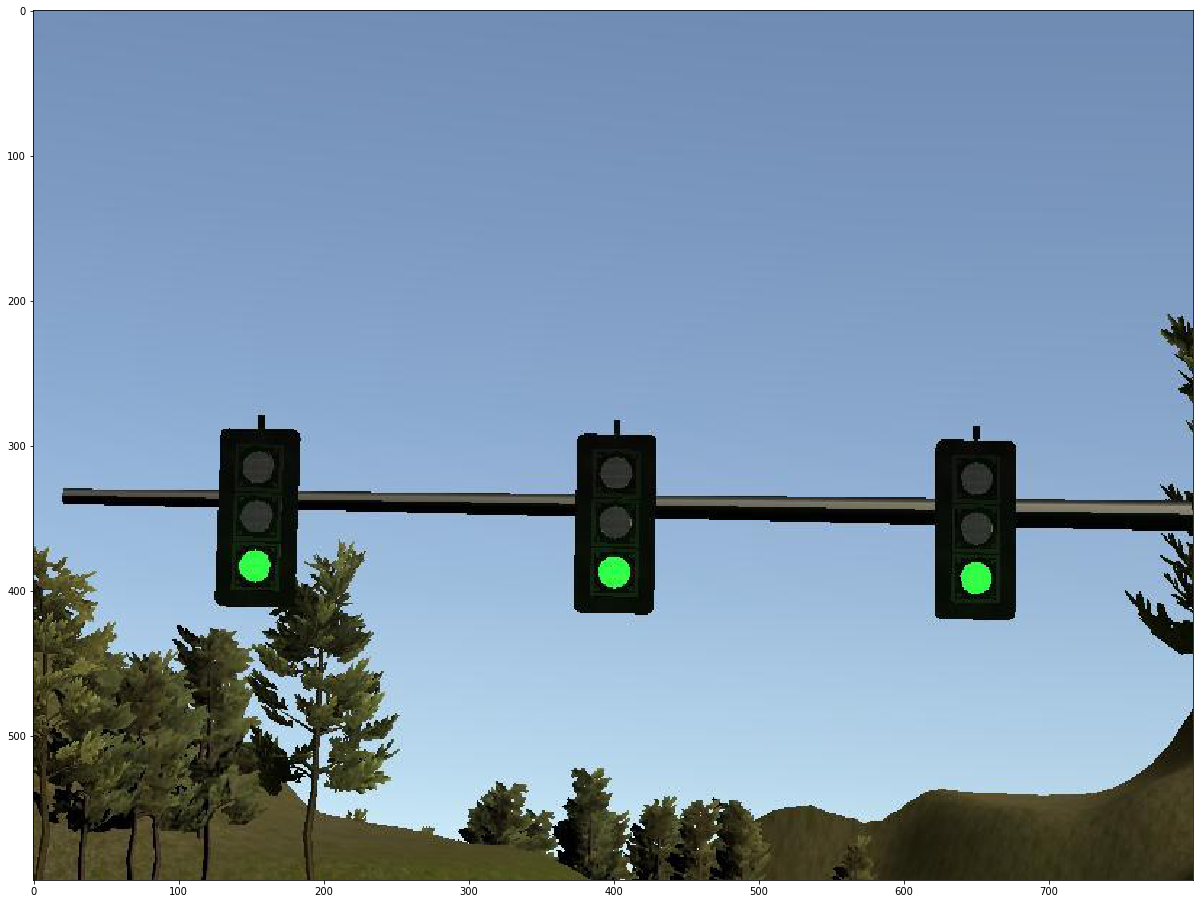

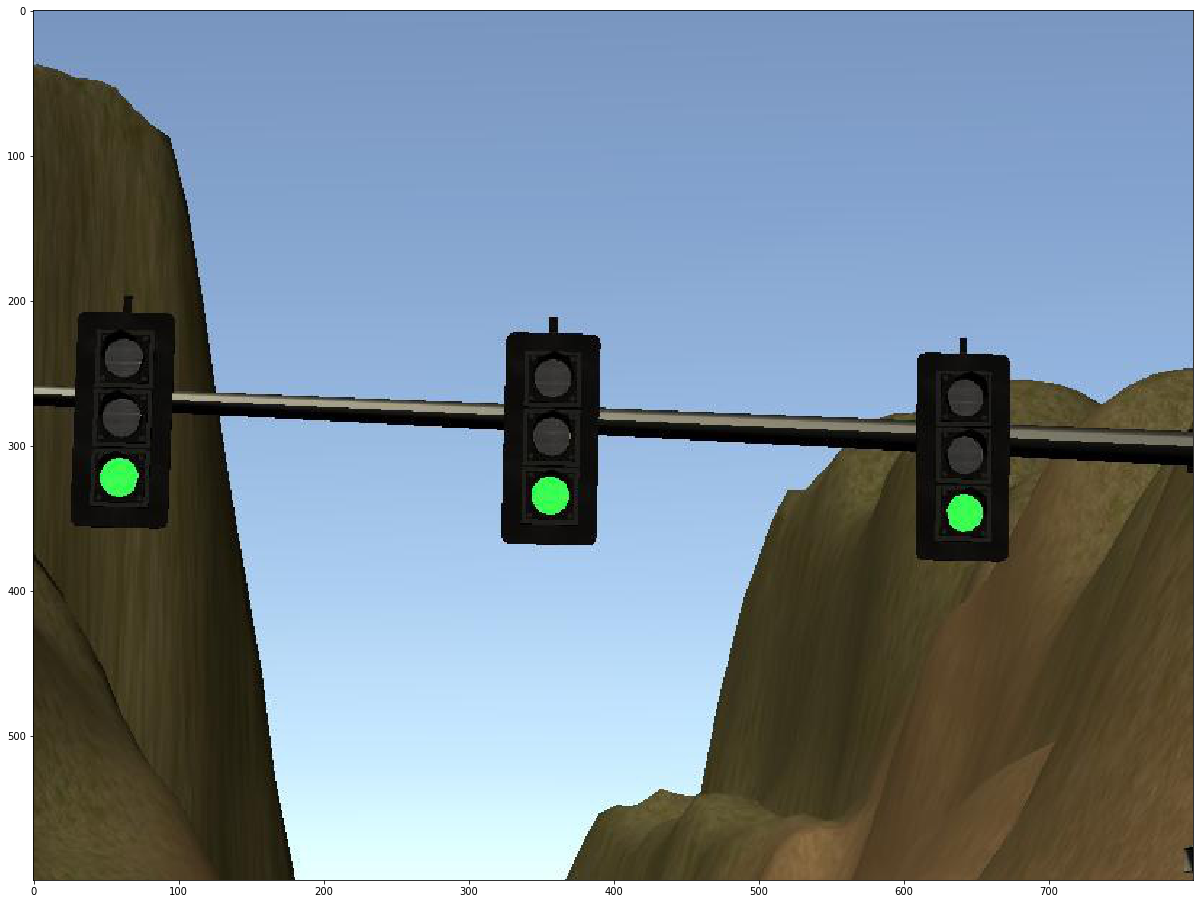

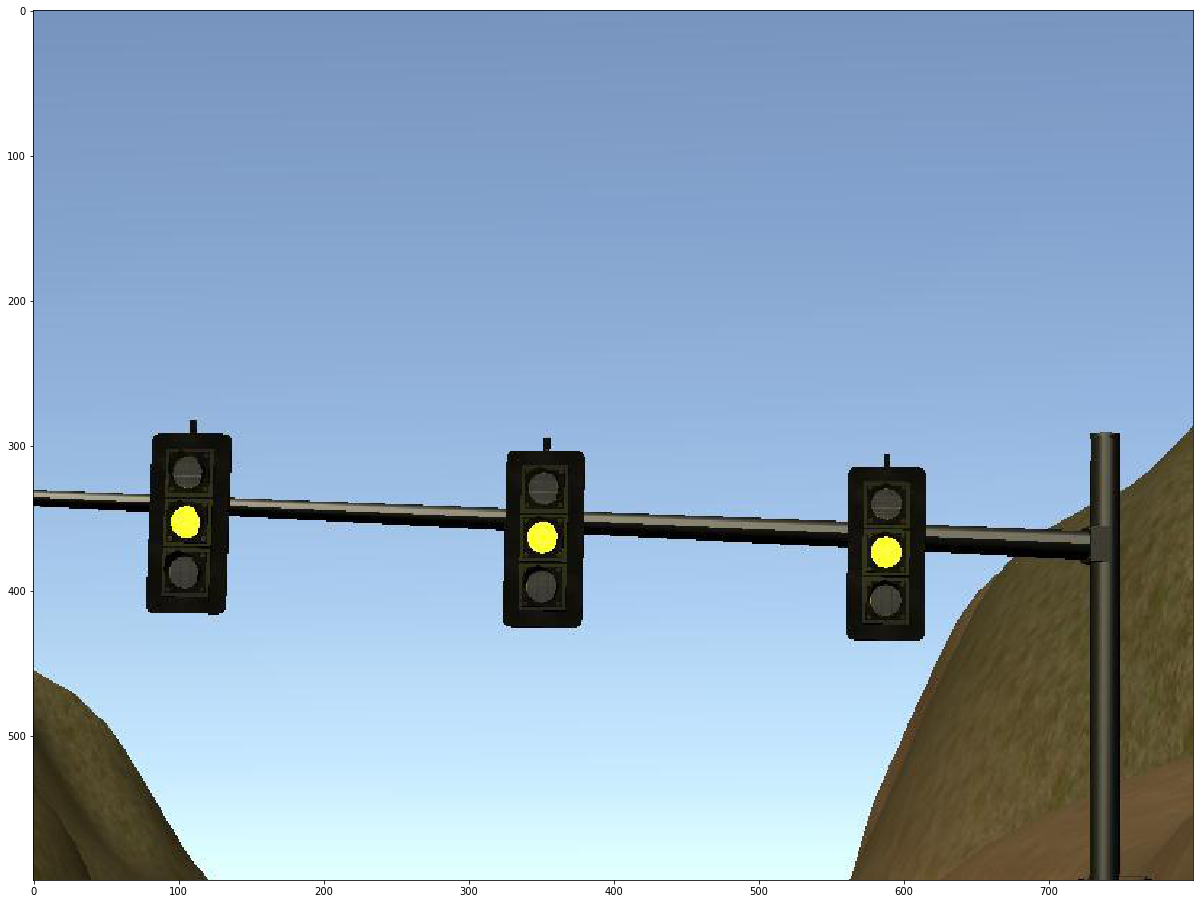

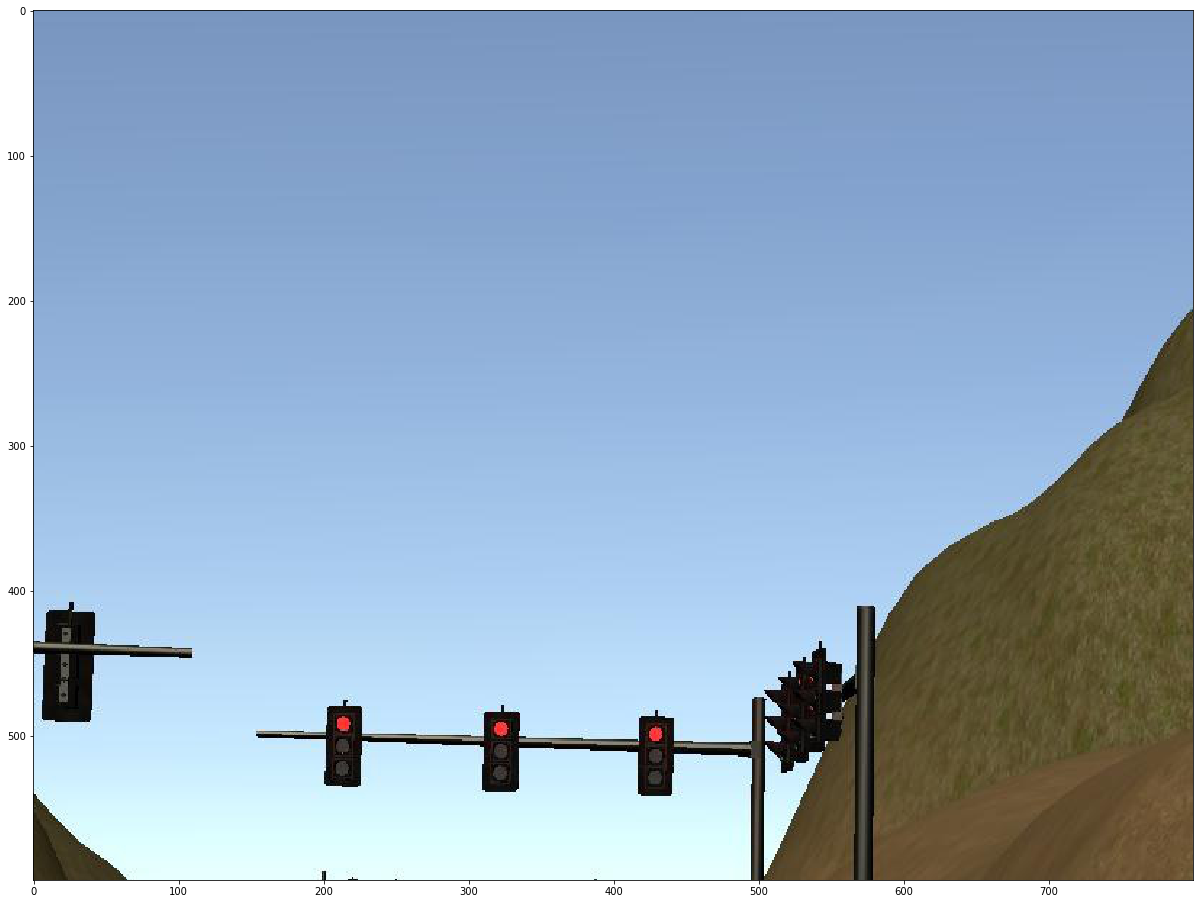

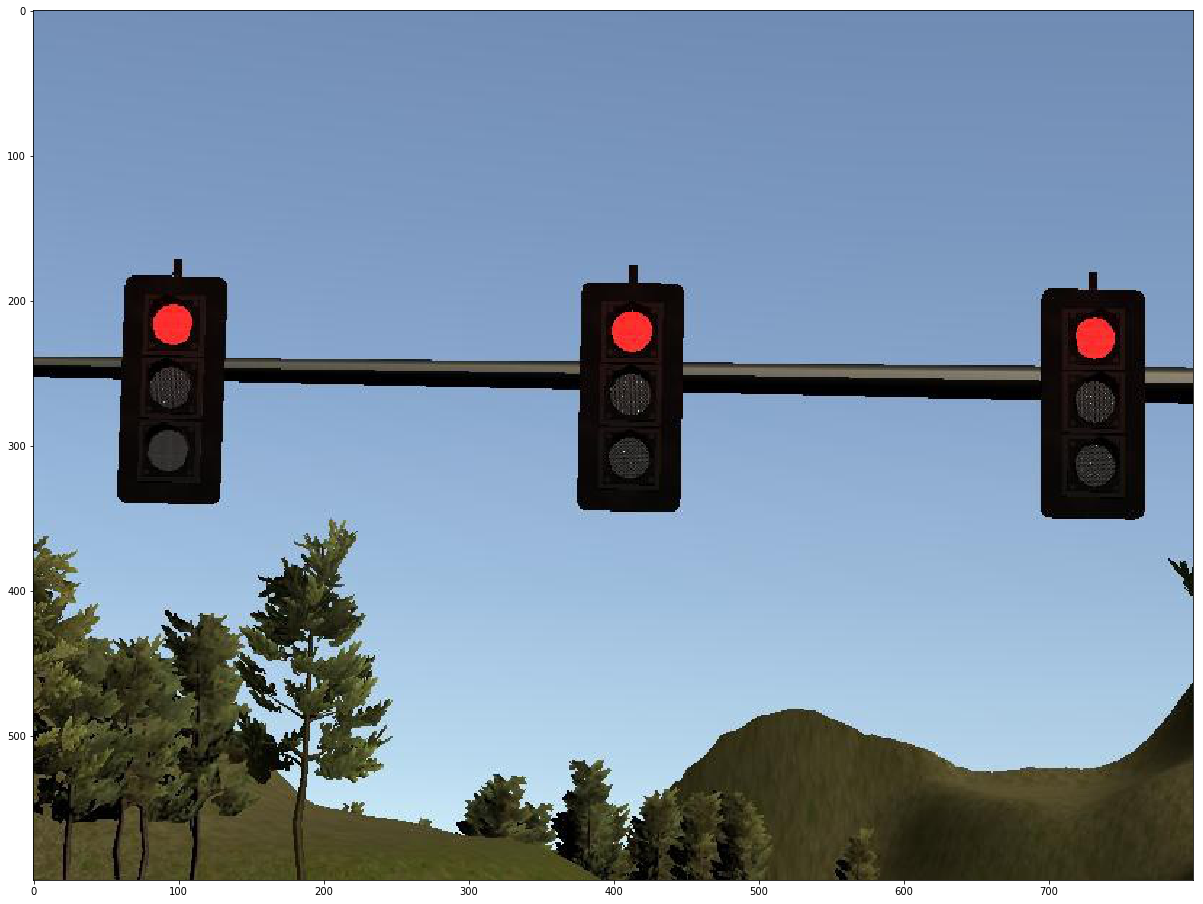

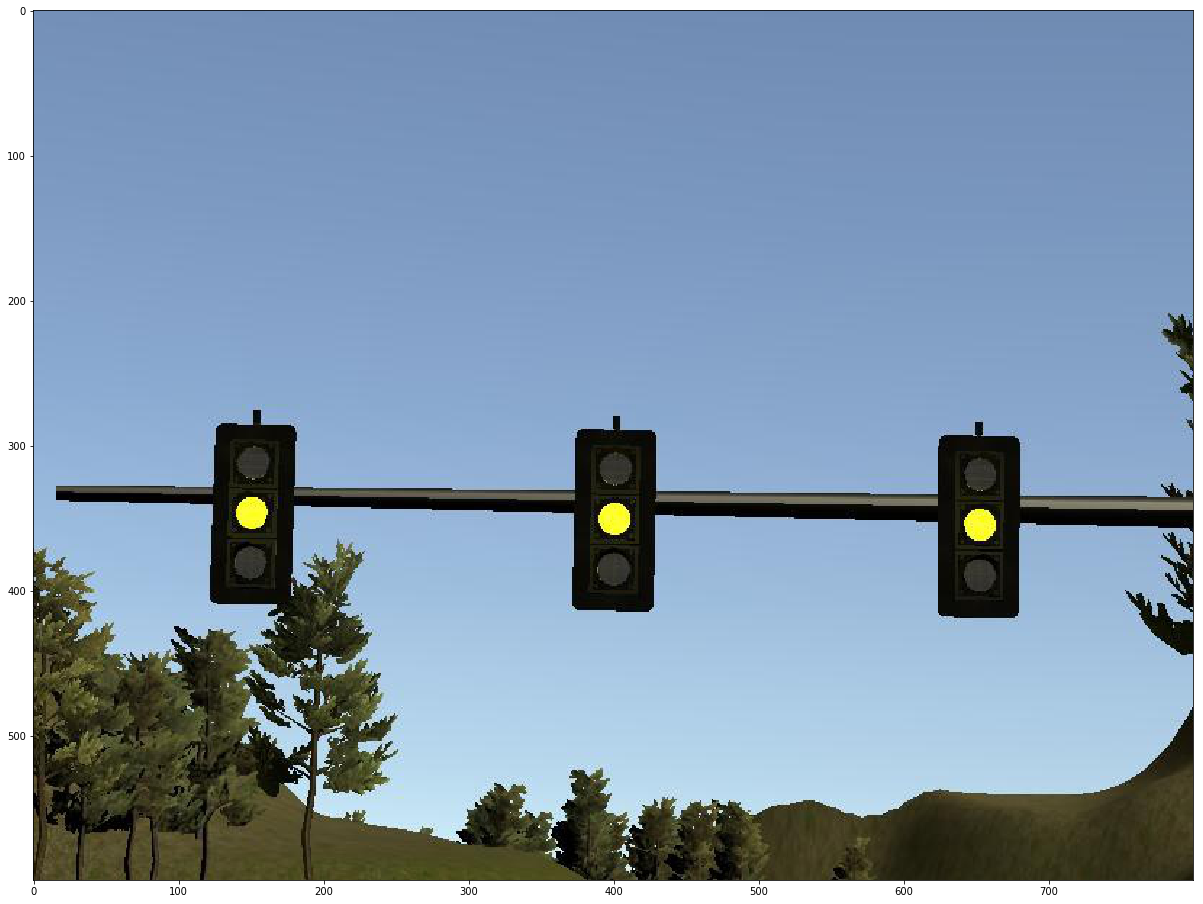

In [4]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
      # Each box represents a part of the image where a particular object was detected.
      boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
      # Each score represent how level of confidence for each of the objects.
      # Score is shown on the result image, together with the class label.
      scores = detection_graph.get_tensor_by_name('detection_scores:0')
      classes = detection_graph.get_tensor_by_name('detection_classes:0')
      num_detections = detection_graph.get_tensor_by_name('num_detections:0')
      # Actual detection.
      (boxes, scores, classes, num_detections) = sess.run(
          [boxes, scores, classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)

In [ ]:
TEST_IMAGE_PATHS

In [ ]:
 #old code
    try:
                    image = mpimg.imread(dir + '/' + name + '.jpg') # make a check if file exists
                    width = image.shape[1]
                    height = image.shape[0]
                    crop(dir + '/' + name + '.jpg' ,dir + '/tiles/'+ name + '.jpg',3)
                    tile_i,tile_j,tile_xPos,tile_yPos = get_tile_coordinates(xPos,yPos,width,height,3)
                    labelWriter.writerow([dir  + '/tiles/' + name +'_'+str(tile_i)+'_'+str(tile_j) + '.jpg', width, height, 'GCP', tile_xPos-20,tile_yPos-20,tile_xPos+20,tile_yPos+20])

                    
                except:
                    image = mpimg.imread(dir + '/' + name + '.JPG')
                    width = image.shape[1]
                    height = image.shape[0]
                    crop(dir + '/' + name + '.JPG' ,dir + '/tiles/'+ name + '.JPG',3)
                    tile_i,tile_j,tile_xPos,tile_yPos = get_tile_coordinates(xPos,yPos,width,height,3)
                    labelWriter.writerow([dir  + '/tiles/' + name +'_'+str(tile_i)+'_'+str(tile_j) + '.jpg', width, height, 'GCP', tile_xPos-20,tile_yPos-20,tile_xPos+20,tile_yPos+20])
